# IV - Pairwise alignment

With this code you can construct search the number of different bases in two (DNA) sequences. You do not need any supplementary materials. 

You can find all material in our GitHub repository iGEM_UGent_2020. 

## Set your working directory

First, set up your working directory. Standard, this is the location where this jupyter notebook is situated. 

In [30]:
import os
wdir = os.getcwd()
print(wdir)

C:\Users\강석민\graduationProject\LAB\From Sequences to Relationships\4 - Pairwise Alignment


## The Pairwise Alignment algorithm 

We use two separate functions to construct the dot plot. Further, we calculate the number of aligned and unaligned bases. 
Later on, we will recycle the fill_print() function!

In [87]:
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as pltpy

# function with the decisions for the dot plot
def fillMatrix(M):
    # add windows size W
    ct = 0
    M[0][0] = " "
    for r in range(1, M.shape[0]):
        for c in range(1, M.shape[1]):
            if M[r][0] == M[0][c]:
                M[r][c] = "*"
                if r == c:
                    ct += 1
                else:
                    M[r][c] = " "
            else:
                M[r][c] = " "
    incorr = M.shape[0] - ct - 1
    print("Number of aligned bases:", ct)
    print("Number of unaligned bases:", incorr, "\n")

# Create and print the dot plot
def fill_print():
    D = np.zeros([len(sequence1)+1,len(sequence2)+1],dtype=str)
    for r in range(0, len(sequence1)):
        D[r+1][0] = sequence1[r:r+1]
    for c in range(0, len(sequence2)):
        D[0][c+1] = sequence2[c:c+1]
    fillMatrix(D)
    print(D)

def fill_plot():
    D = np.zeros([len(sequence1)+1,len(sequence2)+1],dtype=str)
    #print (D), print (D.shape[0])
    for r in range(0, len(sequence1)):
        D[r+1][0] = sequence1[r:r+1]
    for c in range(0, len(sequence2)):
        D[0][c+1] = sequence2[c:c+1]
    fillMatrix(D)
                
    cmap = plt.colors.ListedColormap(['white', 'black'])
    bounds = [0,0.5,1]
    norm = plt.colors.BoundaryNorm(bounds, cmap.N)
   
    fig, ax = pltpy.subplots(figsize=(25, 25), dpi=100)
    D_red = np.delete(D, 0, axis=1)
    D_red = np.delete(D_red, 0, axis=0)
    D_red_log = D_red == "*"
    ax.imshow(D_red_log, cmap=cmap, norm=norm)
    
    """
    # Try to get contours around the diagonal (?)
    for r in range(0, len(sequence1)):
        for c in range(0,len(sequence2)):
            if r == c:
                pltpy.contour(D, color="red")
    """
   
    pltpy.show()

## (1) A small example

First, let's use two small sequence fragments so we can show the dot plot as well!

In [88]:
sequence1 = "GAGATTACAGATTACAT"
sequence2 = "TACCATTGGATTACAGT"

fill_print()

Number of aligned bases: 4
Number of unaligned bases: 13 

[[' ' 'T' 'A' 'C' 'C' 'A' 'T' 'T' 'G' 'G' 'A' 'T' 'T' 'A' 'C' 'A' 'G' 'T']
 ['G' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['A' ' ' '*' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['G' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['A' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['T' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['T' ' ' ' ' ' ' ' ' ' ' '*' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['A' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['C' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['A' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['G' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['A' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ']
 ['T' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' ' '

Number of aligned bases: 4
Number of unaligned bases: 13 



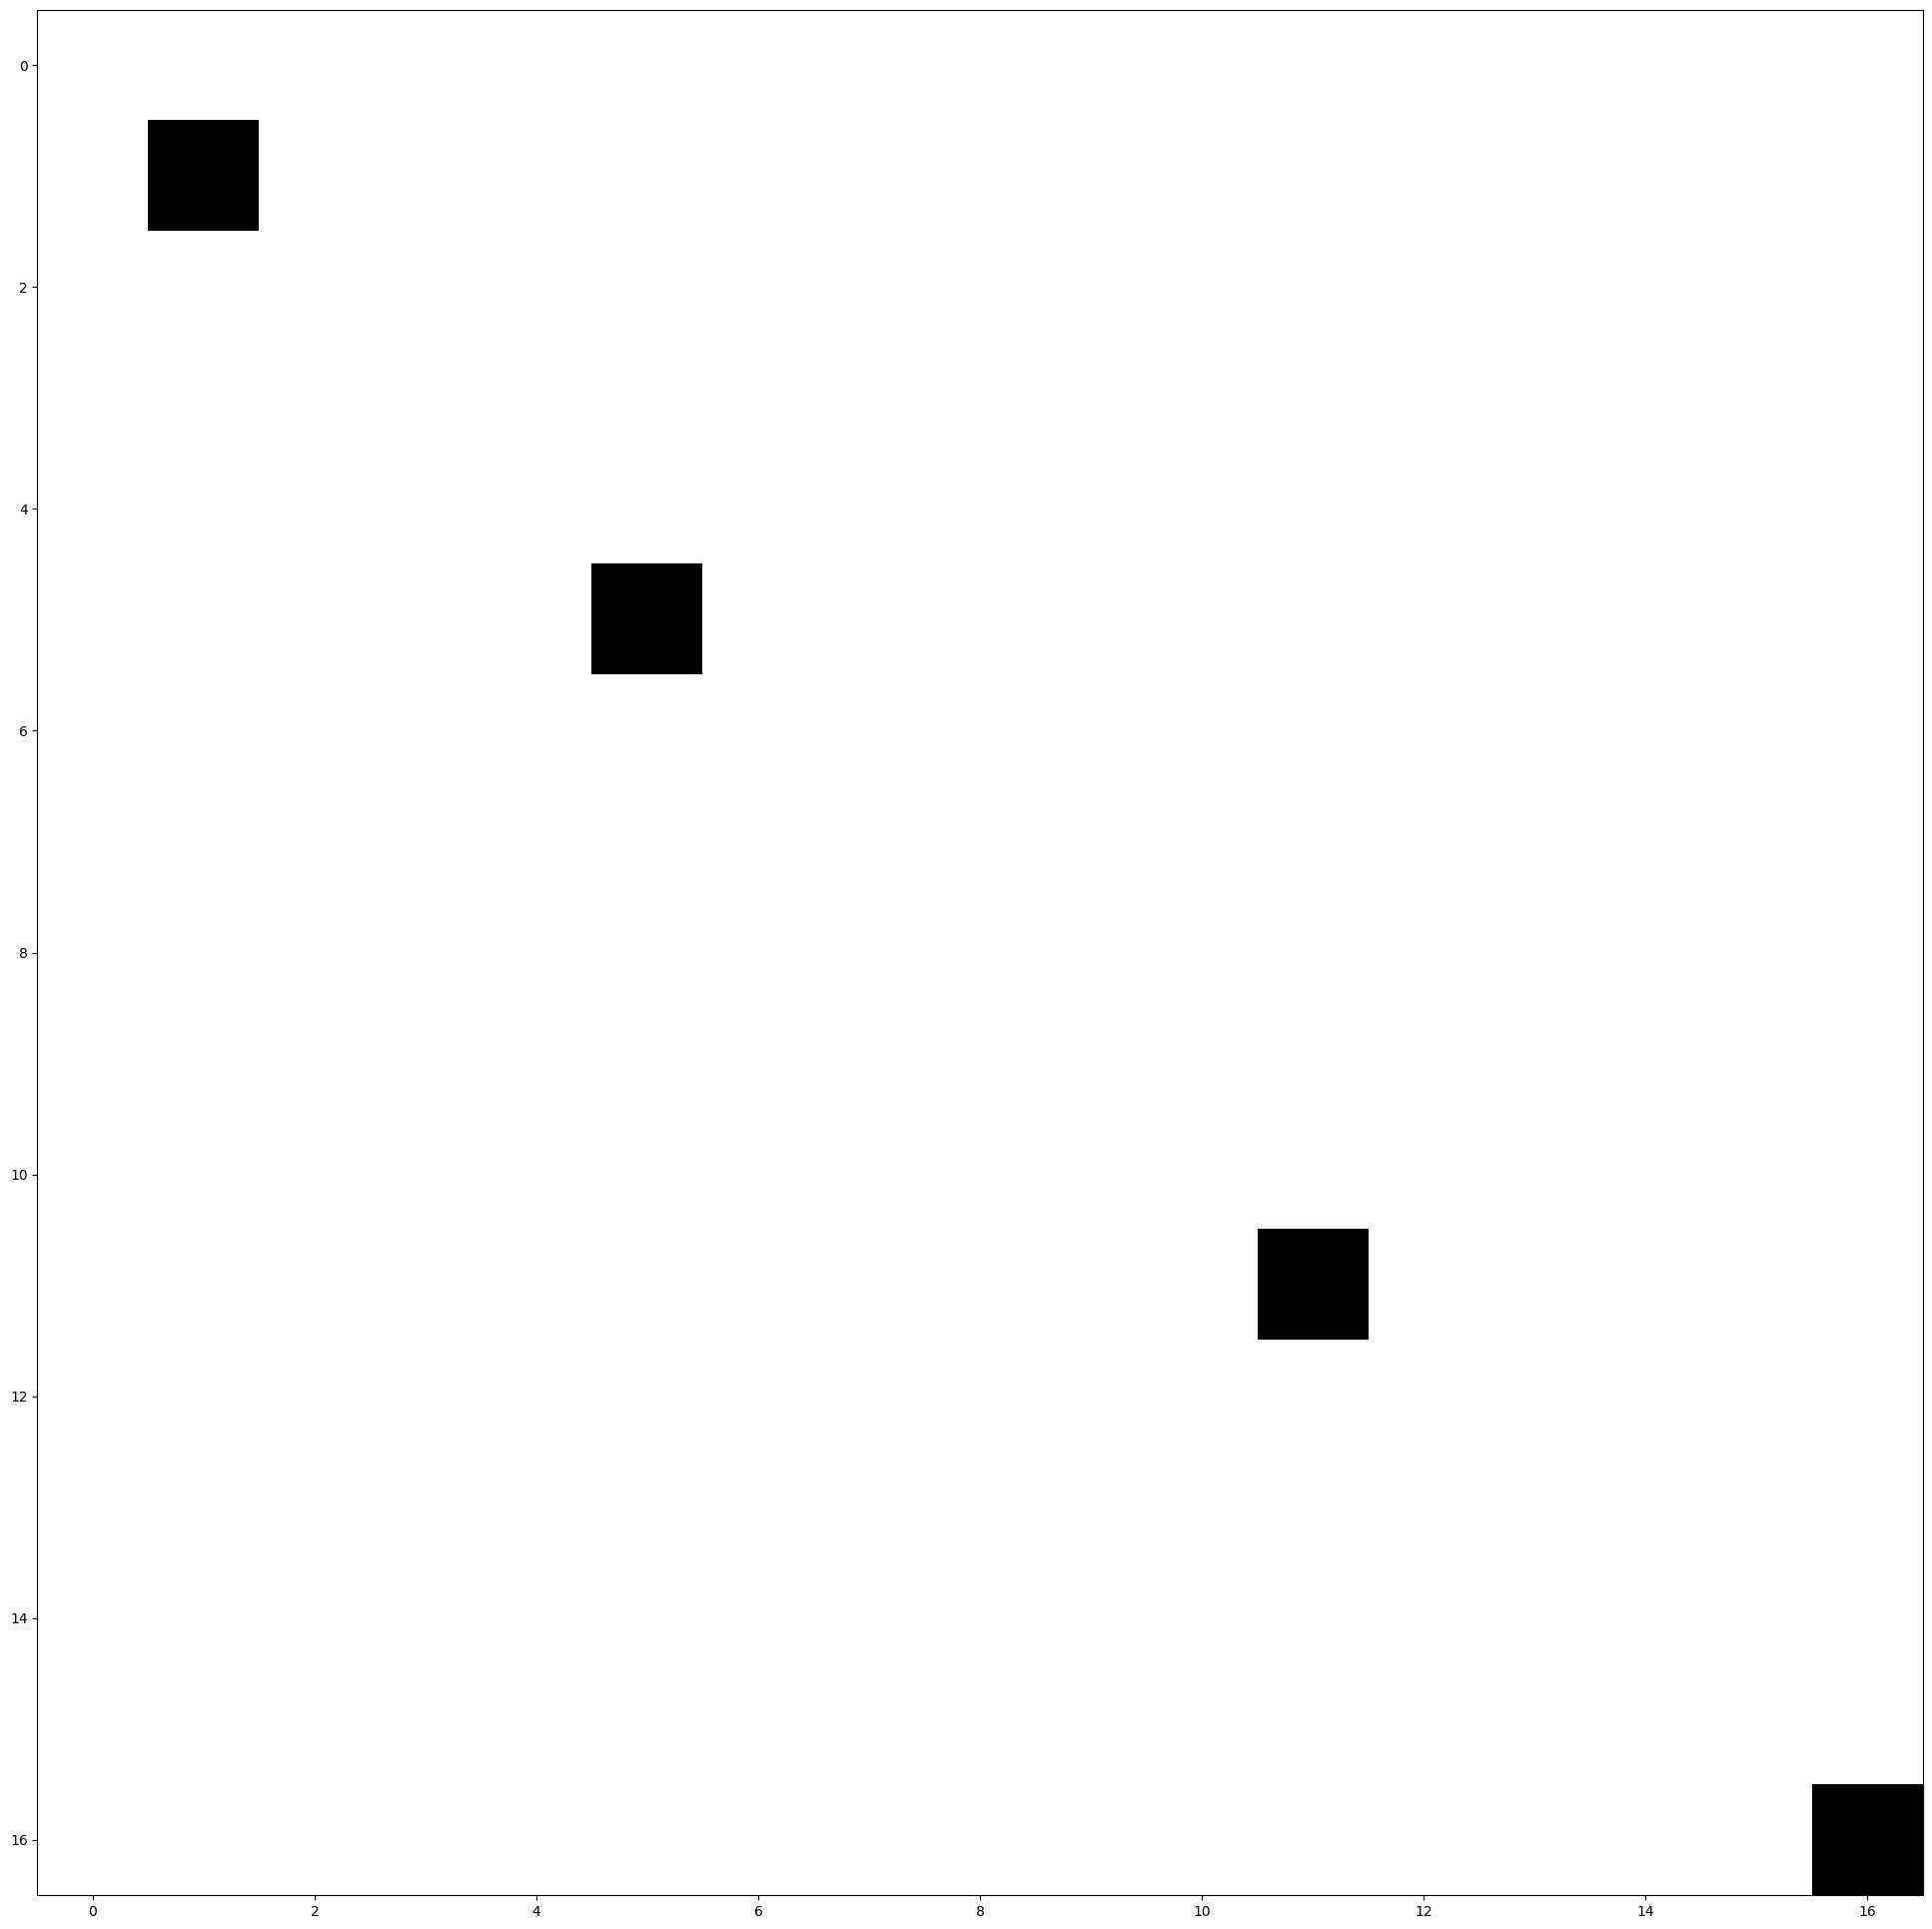

In [89]:
sequence1 = "GAGATTACAGATTACAT"
sequence2 = "TACCATTGGATTACAGT"

fill_plot()

## (2) Real sequences

First, we have to retrieve the sequences from NCBI Genbank.
It is recommended to do this outside the US working hours to not overload the NCBI servers. When you get the HTTP error, you cannot retrieve the sequences because of server overload. You can then use sequence files from our Github page. I put this as default for now.

In [90]:
"""
# Get two sequences
import csv
from Bio import SeqIO
from Bio import Entrez

Entrez.email = "A.N.Other@example.com"
        
fasta_file = {}
with open('accessions_psa.txt') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    for row in csv_reader:
        with Entrez.efetch(db="nucleotide", rettype="gb", retmode = "text", id = row[0]) as handle:
            for seq_record in SeqIO.parse(handle, "gb"):
                fasta_file[row[1]] = str(seq_record.seq)


"""
be = open("corona19.txt","r")
besr = be.read()
sequence1 = besr[15000:16000]
be.close()

ch = open("avian.txt","r")
chsr = ch.read()
sequence2 = chsr[15000:16000]
ch.close()

# We only take a look at 10000 bases from the complete sequence! 

Using the fill_plot function will not work out. That takes too long and is not really lovely to see!

Number of aligned bases: 255
Number of unaligned bases: 745 



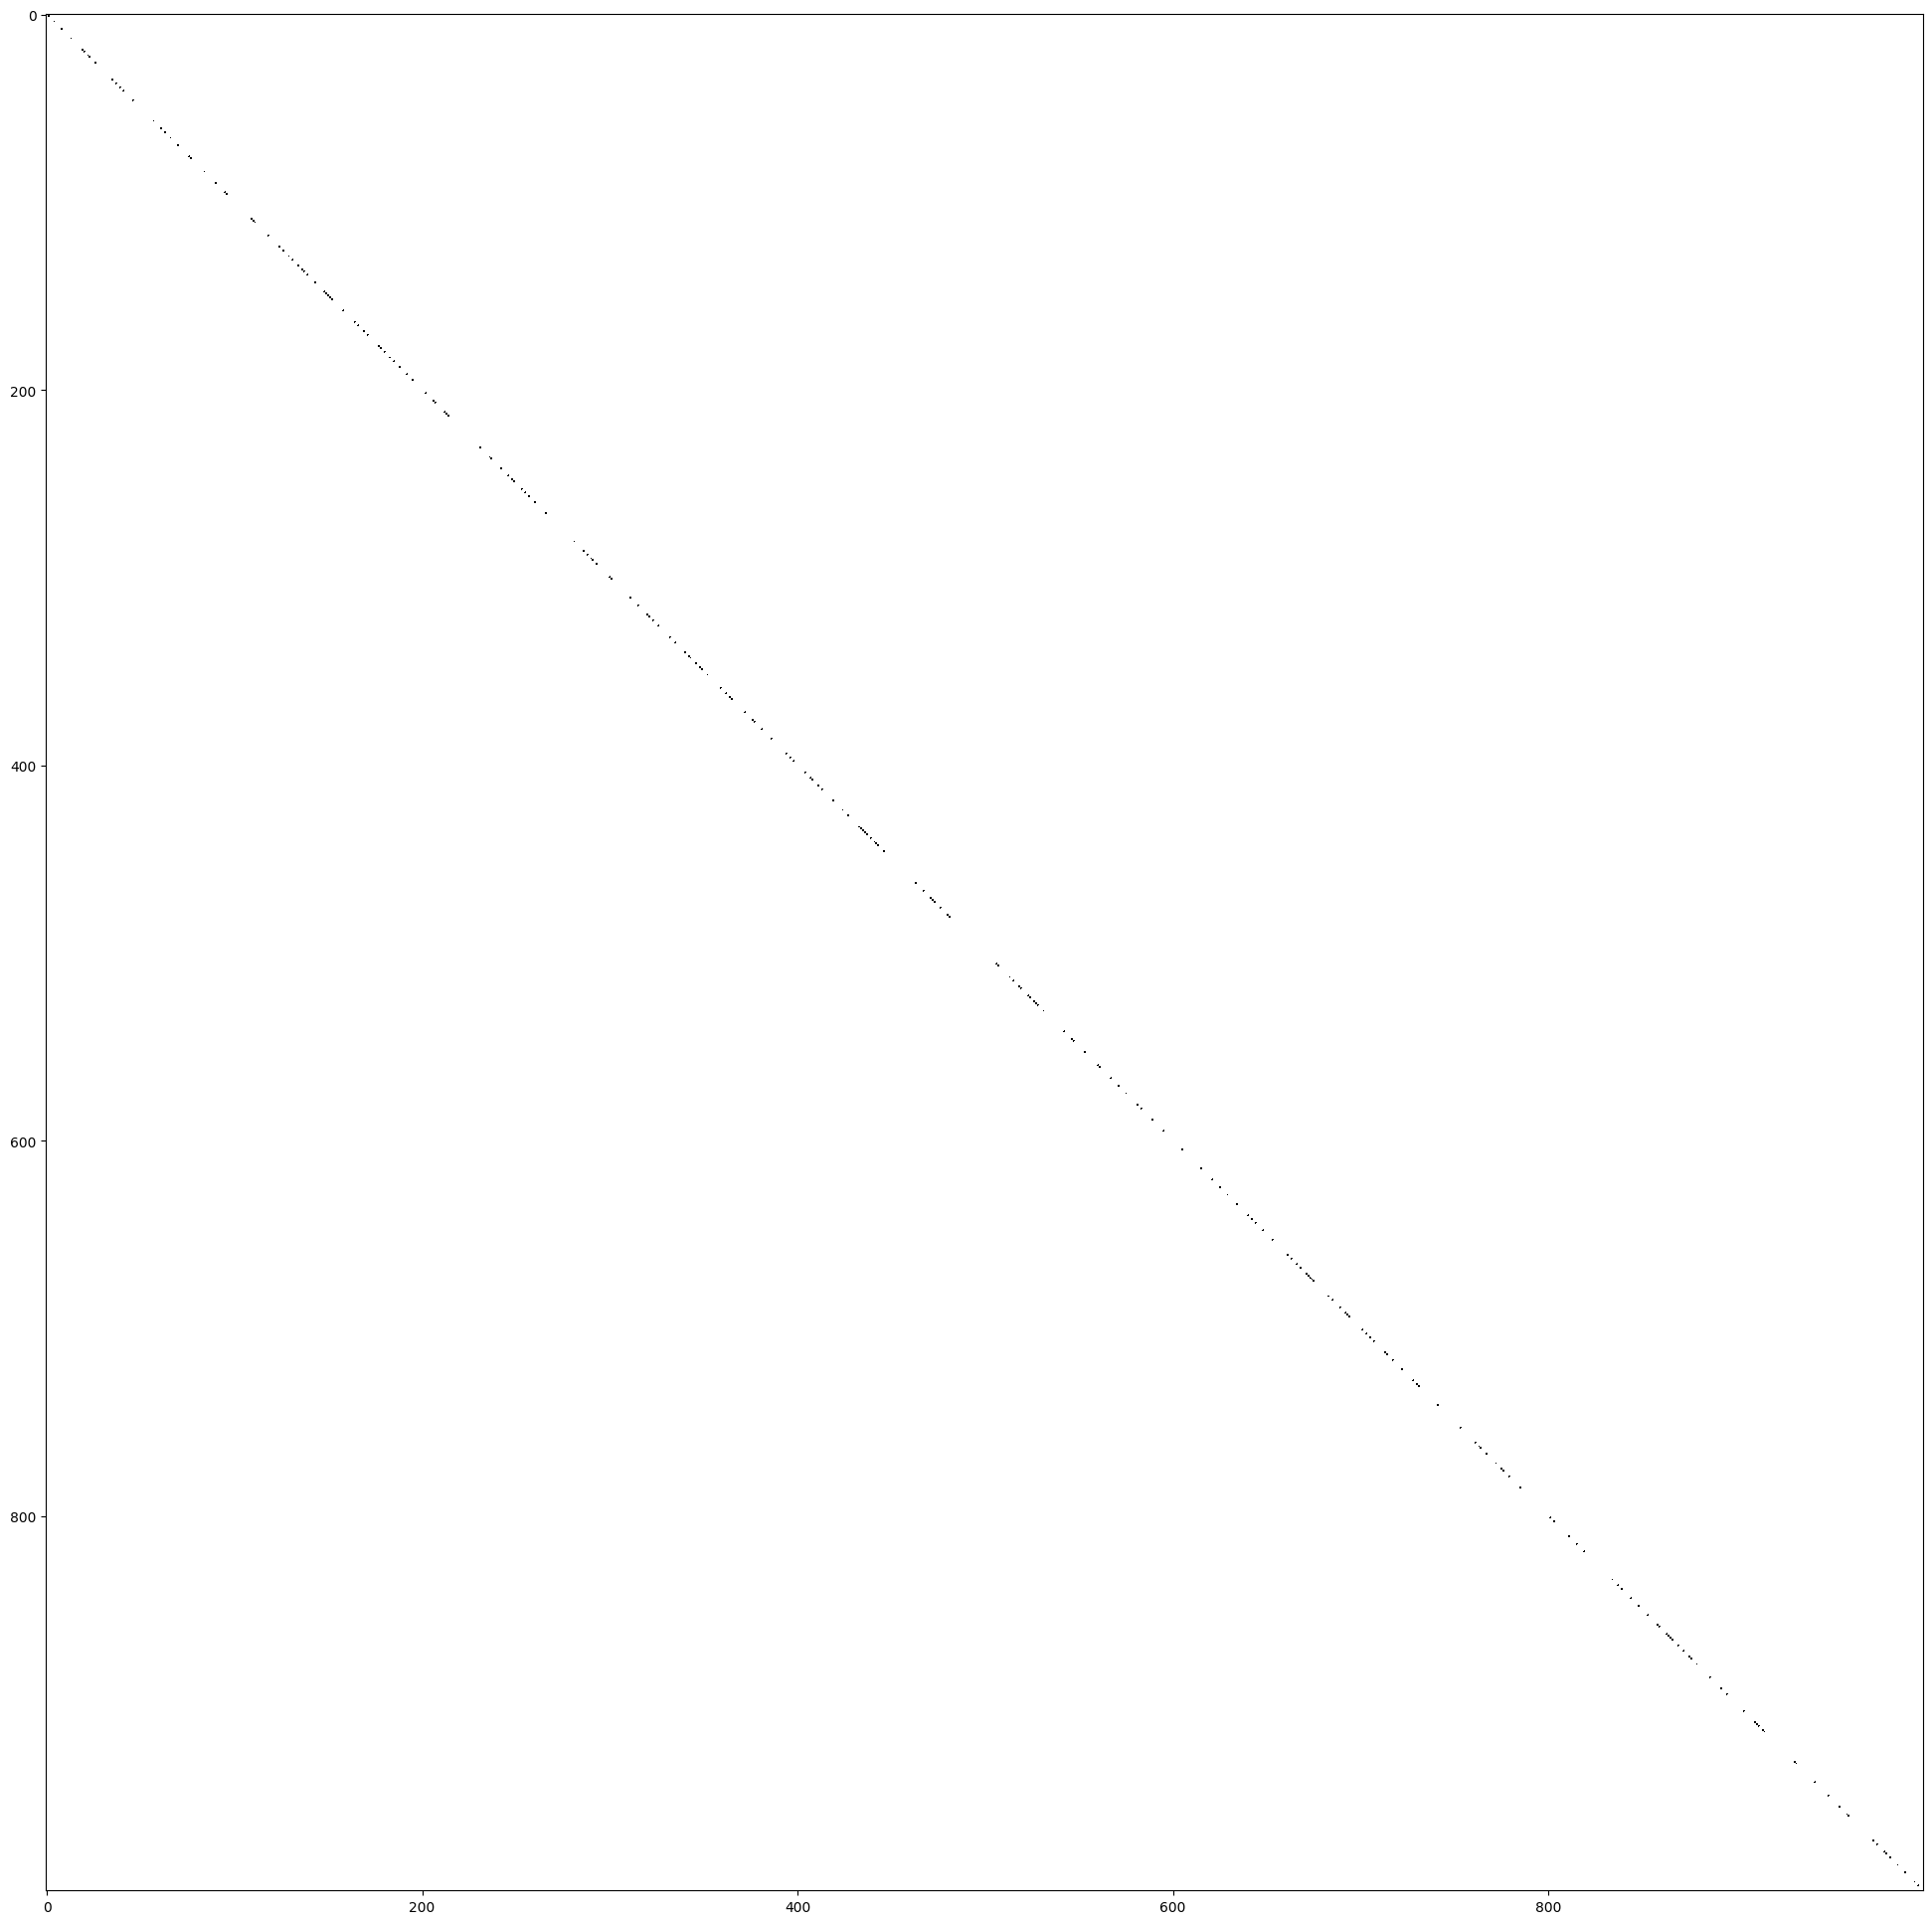

In [91]:
fill_plot()

## (3) Protein sequences

To give an idea, we can use the fill_plot function for protein sequences as well. 

Number of aligned bases: 37
Number of unaligned bases: 356 



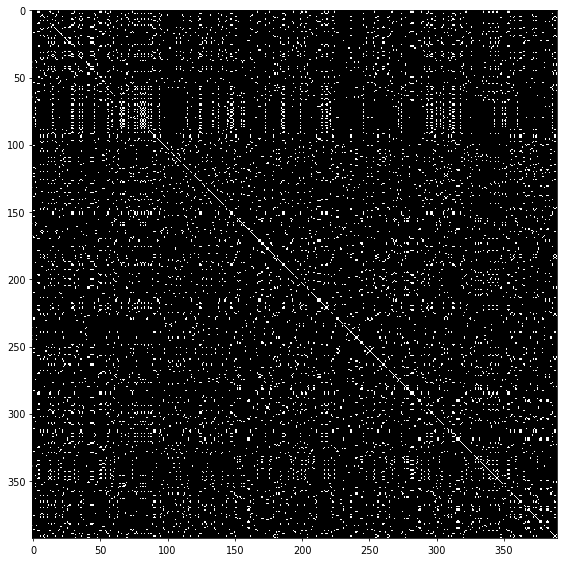

In [36]:
"""
# Get two sequences
from Bio import SeqIO
from Bio import Entrez

Entrez.email = "A.N.Other@example.com"

with Entrez.efetch(db="Protein", rettype="gb", retmode = "text", id = "NP_000537.3 ") as handle:
    for seq_record in SeqIO.parse(handle, "gb"):
        human = str(seq_record.seq)
     
f = open("p53_human.txt","w+")
f.write(human)
f.close()

with Entrez.efetch(db="Protein", rettype="gb", retmode = "text", id = "NP_035770.2 ") as handle:
    for seq_record in SeqIO.parse(handle, "gb"):
        mouse = str(seq_record.seq)
  
f = open("p53_mouse.txt","w+")
f.write(mouse)
f.close()

"""

# open both sequences
h = open("p53_human.txt","r")
sequence1 = h.read()
#hs = besr[0:1000]
h.close()

m = open("p53_mouse.txt","r")
sequence2 = m.read()
#ms = chsr[0:1000]
m.close()

# print dot plot
fill_plot()

## Remark

In this tutorial, we only touch upon the creation of a dot-plot. This type of plot can give a lot of information on the sequences that you put on the plot. You can also create a window size that will reduce the noice on the plot. 
<br />

Some ideas: 
* plot a sequence and its reverse sequence 
* put a gene against its CDS 
* plot two isoforms of the same protein

## References & further reading

Chang, J., Chapman, B., Friedberg, I., Hamelryck, T., de Hoon, M., Cock, P., Antao, T., Talevich, E., Wilczynski, B. (2020). Biopython Tutorial and Cookbook, Biopython 1.77. Available via biopython.org

On finetuning and the interpretation of dot-plots: https://omicstutorials.com/interpreting-dot-plot-bioinformatics-with-an-example/

